<a href="https://colab.research.google.com/github/crealkiller/Major-Project-2/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# Importing libraries
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# To Load anddisplay diabetes dataset
data=load_diabetes()
print(data)
#Renaming colums with features and target
#Column target is binary (0,1)
df = pd.DataFrame(data.data, columns=[f'feature{i}' for i in range(data.data.shape[1])])
df['target']=(data.target > 150).astype(int)
#Displaying edited dataset
print(df.head())

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [27]:
#Data Preprocessing
#Handling missing values
#Scaling numerical features
scaler = StandardScaler()
df[df.columns[:-1]]=scaler.fit_transform(df[df.columns[:-1]])

#Splitting data into traing and testing
X_train,X_test,y_train,y_test=train_test_split(df[df.columns[:-1]], df['target'], test_size=0.2, random_state=42)

In [28]:
#Model Type
#Training the model
#Random Forest
rf_model=RandomForestClassifier(random_state=42)
print(rf_model.fit(X_train, y_train))

#Support Vector Machines (SVM)
svm_model=SVC(probability=True, random_state=42)
print(svm_model.fit(X_train, y_train))

RandomForestClassifier(random_state=42)
SVC(probability=True, random_state=42)


Random Forest ModVl Evaluation:
Accuracy: 0.7303370786516854
Precision: 0.7222222222222222
Recall: 0.65
F1 Score: 0.6842105263157895
ROC AUC Score: 0.8091836734693878


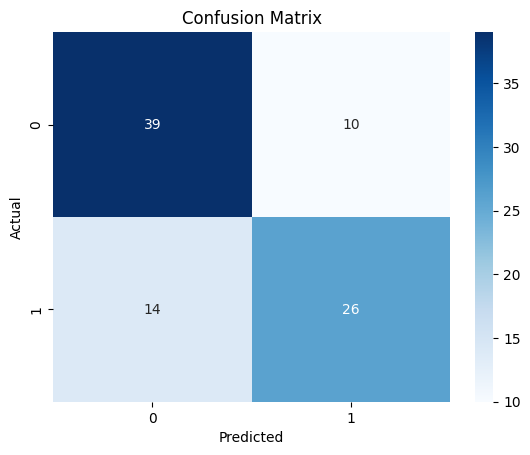

None
SVM Model Evaluation:
Accuracy: 0.7640449438202247
Precision: 0.8275862068965517
Recall: 0.6
F1 Score: 0.6956521739130435
ROC AUC Score: 0.8459183673469388


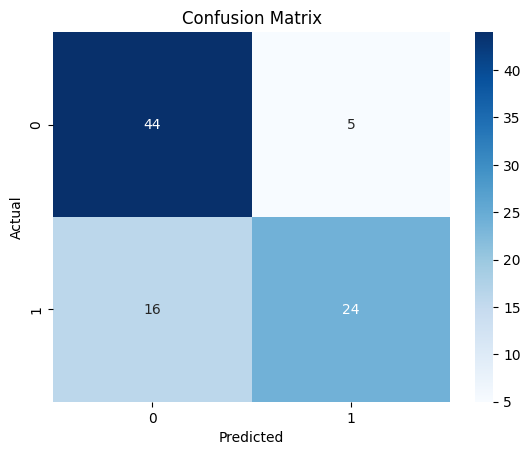

None


In [29]:
#Final model Evaluation

#Evaluateing Random Forest model
print("Random Forest ModVl Evaluation:")
print(evaluate_model(rf_model,X_test,y_test))

#Evaluateing SVM model
print("SVM Model Evaluation:")
print(evaluate_model(svm_model,X_test,y_test))